# Minor Project - EDA & MAchine Learning  on Google Playstore Dataset

## 🧾 Introduction

The Google Play Store is home to thousands of mobile applications across various categories. This project performs Exploratory Data Analysis (EDA) to uncover insights from app metadata available on the Play Store. It includes steps for data cleaning, transformation, and visualization to identify trends and relationships.

### Objectives:
- Understand the dataset structure
- Clean and preprocess data
- Generate meaningful visualizations
- Apply machine learning models for prediction and evaluation

## 📥 Importing Required Libraries and Dataset

We begin by importing essential Python libraries such as Pandas, NumPy, Matplotlib, and Seaborn. The dataset is read into a DataFrame for further processing.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("googleplaystore.csv")
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


## 🧾 Initial Dataset Overview

Here, we check:
- The number of rows and columns
- Column data types
- Null values
- General metadata

This helps us plan our cleaning and preprocessing steps.

In [3]:
df.shape  #for checking the rows and columns number of the dataset

(10841, 13)

In [4]:
df.info()  # To evaluate the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.isna().sum()  # To evaluate number of null values

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## 🧼 Data Cleaning and Preprocessing

### 🧹 1. Handling Missing Values
We inspect columns with missing data and decide whether to impute, drop, or modify.

### 🔢 2. Data Type Corrections
Several columns such as `Reviews`, `Rating`, `Installs`, and `Price` are not in the proper data types and need conversion.

### ⬇️ 3. Cleaning 'Installs' Column
- Remove '+' and commas
- Convert to numeric

In [6]:
# Remove rows where essential fields like Rating are missing
df = df.dropna(subset=['Rating'])

# Remove duplicate rows if any
df = df.drop_duplicates()


In [7]:
# Convert Rating and Reviews to numeric
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [8]:
# Remove problematic entries in 'Installs'
df = df[df['Installs'].notna()]
df = df[~df['Installs'].isin(['Free'])]

In [9]:
# Clean and convert Installs
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

In [10]:
# Clean and convert Price
df['Price'] = df['Price'].str.replace('$', '', regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [11]:
# Drop rows with missing values in critical fields after conversion
df = df.dropna(subset=['Reviews', 'Installs', 'Price'])

# Optionally fill other columns with mode or a placeholder if needed
df['Content Rating'] = df['Content Rating'].fillna(df['Content Rating'].mode()[0])

In [12]:
# Strip whitespace from strings
df['Category'] = df['Category'].str.strip()
df['Type'] = df['Type'].str.strip()
df['Content Rating'] = df['Content Rating'].str.strip()

# Reset index for cleaner handling later
df.reset_index(drop=True, inplace=True)


In [13]:
# Final Data Review
print("✅ Cleaned Dataset Shape:", df.shape)
print("\n📋 Columns and Data Types:\n", df.dtypes)
print("\n🔍 Sample Rows:\n", df.head())

✅ Cleaned Dataset Shape: (8279, 13)

📋 Columns and Data Types:
 App                object
Category           object
Rating            float64
Reviews           float64
Size               object
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

🔍 Sample Rows:
                                                  App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

    Reviews  Size  Installs  Type  Price Content Rating  \
0     159.0   19M     10000

In [14]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,FR Calculator,FAMILY,4.0,7.0,2.6M,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
8275,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
8276,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6M,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
8277,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [15]:
df['Rating'].value_counts()

Rating
4.3    966
4.4    961
4.5    909
4.2    831
4.6    692
4.1    627
4.0    518
4.7    432
3.9    356
3.8    273
5.0    243
3.7    220
4.8    192
3.6    159
3.5    147
3.4    117
3.3     96
4.9     81
3.0     74
3.1     65
3.2     62
2.9     40
2.8     37
2.6     22
2.7     21
2.5     19
2.3     18
2.4     17
2.2     14
1.0     14
1.9     12
2.0     11
2.1      8
1.7      7
1.8      7
1.6      4
1.4      3
1.5      3
1.2      1
Name: count, dtype: int64

## 🖼️ Data Visualizations

Visualizations are created using `matplotlib` and `seaborn` to highlight:

### 📊 Number of Apps per Category(Top 15 Categories)
A bar chart showing how many apps exist in each category.

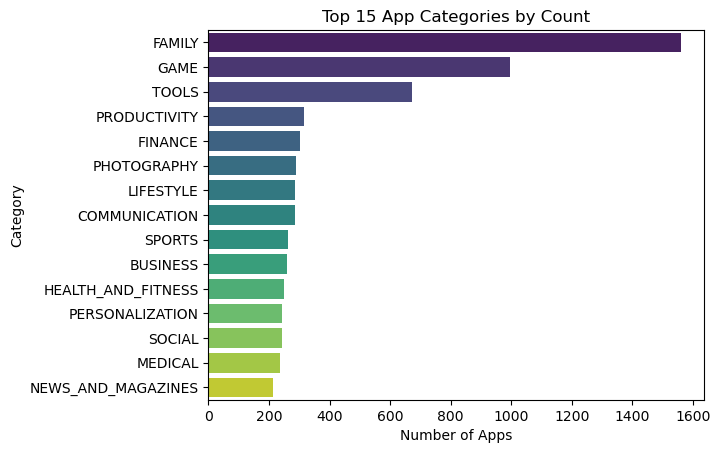

In [16]:
top_categories = df['Category'].value_counts().head(15)
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Top 15 App Categories by Count')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()

### 📈 5.1 Distribution of App Ratings
Plot histogram to understand the spread of user ratings.

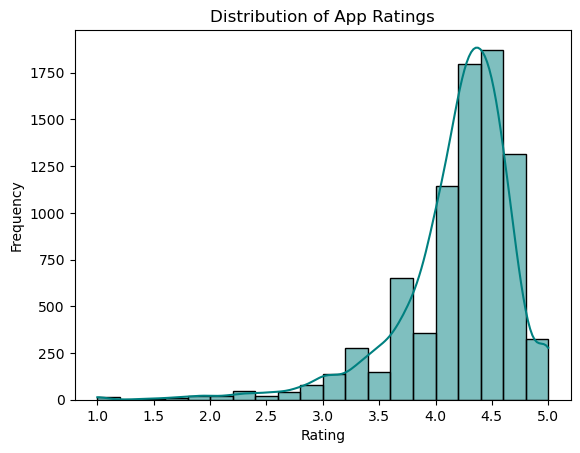

In [17]:
sns.histplot(df['Rating'], bins=20, kde=True, color='teal')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### 📈 Reviews vs Rating (Log Scale)

This scatter plot illustrates the relationship between the number of user reviews and the app rating. A logarithmic scale is applied to the x-axis to better visualize the wide range of review counts.

- Each point represents an app.
- Transparency (`alpha=0.4`) helps reduce overlap in dense regions.
- The log scale makes it easier to observe trends across apps with both low and extremely high review counts.

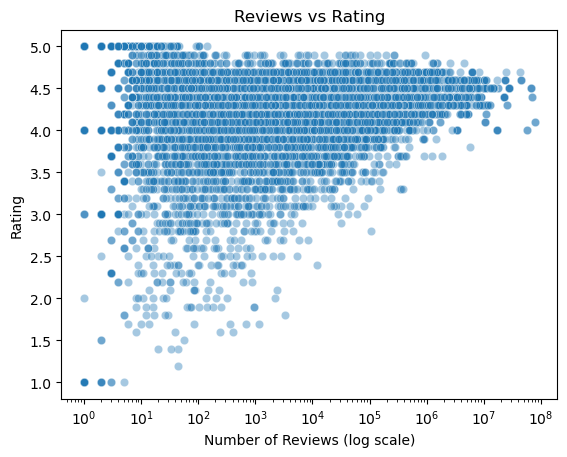

In [18]:
sns.scatterplot(data=df, x='Reviews', y='Rating', alpha=0.4)
plt.xscale('log')
plt.title('Reviews vs Rating')
plt.xlabel('Number of Reviews (log scale)')
plt.ylabel('Rating')
plt.show()

### 📉 5.3 Average Rating by Category
A bar plot of average app ratings across categories.

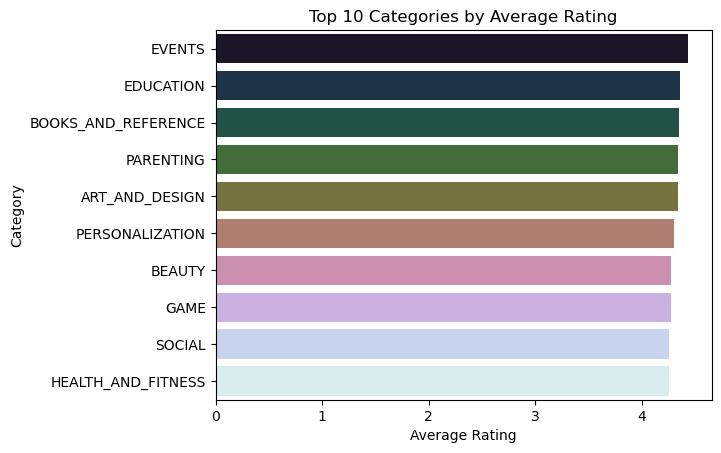

In [19]:
avg_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_rating.values, y=avg_rating.index, palette='cubehelix')
plt.title('Top 10 Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()

### 🧒 Content Rating Distribution

This horizontal count plot displays the distribution of apps across different content rating categories (e.g., Everyone, Teen, Mature 17+).

- Bars are sorted in descending order based on frequency.
- A dark color palette enhances readability and contrast.
- This plot helps assess which audience segments are most commonly targeted by app developers.

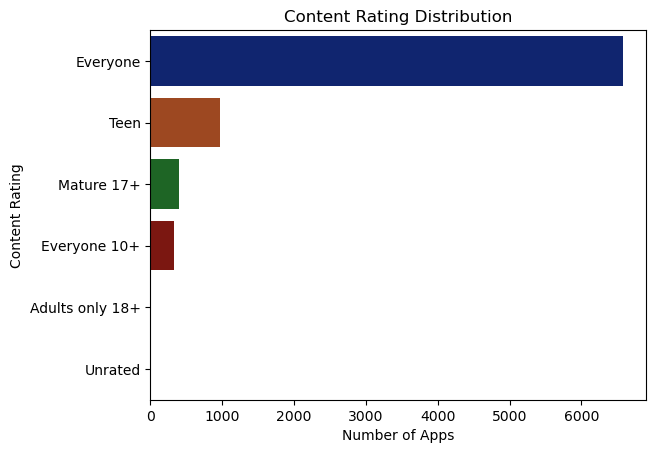

In [20]:
sns.countplot(y='Content Rating', data=df, order=df['Content Rating'].value_counts().index, palette='dark')
plt.title('Content Rating Distribution')
plt.xlabel('Number of Apps')
plt.ylabel('Content Rating')
plt.show()

### 🚀 Top 10 Most Installed Apps

This bar plot highlights the top 10 apps with the highest number of installs from the dataset.

- Apps are sorted in descending order based on their install counts.
- A visually striking "rocket" color palette emphasizes the popularity of these apps.
- Helps identify market leaders and highly adopted apps.


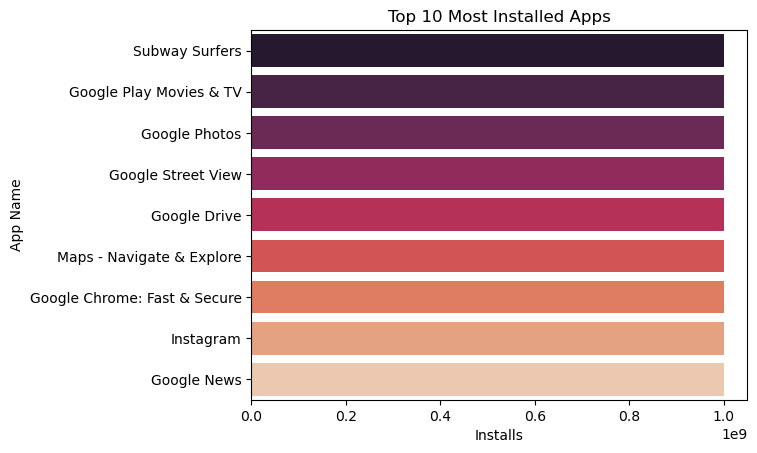

In [21]:
top_installs = df.sort_values(by='Installs', ascending=False).head(10)
sns.barplot(x=top_installs['Installs'], y=top_installs['App'], palette='rocket')
plt.title('Top 10 Most Installed Apps')
plt.xlabel('Installs')
plt.ylabel('App Name')
plt.show()

### 🏆 Top 10 App Categories by Average Number of Reviews

This horizontal bar plot shows the top 10 app categories ranked by their **average number of user reviews**.

- Calculated by grouping apps by category and computing the mean number of reviews.
- Sorted in descending order to highlight the most engaging or widely discussed app types.
- A "flare" color palette enhances visual distinction between categories.

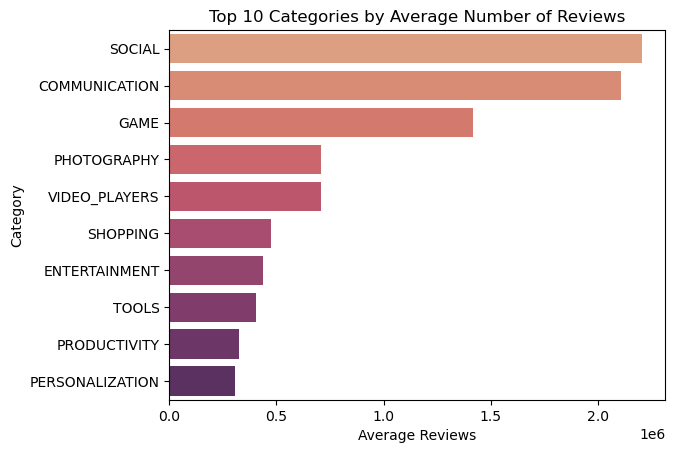

In [22]:
cat_reviews = df.groupby('Category')['Reviews'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=cat_reviews.values, y=cat_reviews.index, palette='flare')
plt.title('Top 10 Categories by Average Number of Reviews')
plt.xlabel('Average Reviews')
plt.ylabel('Category')
plt.show()

### 🔗 Correlation Heatmap

This heatmap displays the pairwise **Pearson correlation coefficients** among key numerical features: `Rating`, `Reviews`, `Installs`.

- The values range from -1 (perfect negative correlation) to +1 (perfect positive correlation).
- The `coolwarm` color palette visually distinguishes strong positive and negative relationships.
- Annotated values make it easy to interpret the strength of associations.


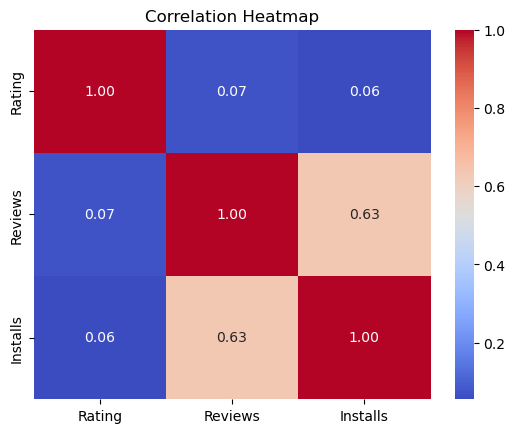

In [23]:
corr = df[['Rating', 'Reviews', 'Installs']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### 🎯 Creating a Binary Target Variable: High Rating

To prepare the data for classification models, we create a new binary target column called `High_Rating`:

- `1` indicates that the app has a **high user rating (≥ 4.7)**
- `0` indicates otherwise

This allows us to frame the prediction problem as a **binary classification task**, identifying whether an app is likely to be highly rated based on its features.

### 🧾 Selected Features

We select the following **numerical features** as predictors:

- `Reviews`: Number of user reviews
- `Installs`: Total install count
- `Price`: App price in USD

These features are chosen for their potential influence on user satisfaction and app rating.

In [28]:
# Create a binary target: 1 if Rating ≥ 4.2 else 0
df['High_Rating'] = df['Rating'].apply(lambda x: 1 if x >= 4.7 else 0)

# Select numeric features only
features = ['Reviews', 'Installs']
X = df[features]
y = df['High_Rating']

### 🧪 Train-Test Split and Feature Scaling

Before applying machine learning models, we divide the data into training and testing subsets and scale the features for better model performance.

#### 📤 Train-Test Split

We split the dataset into:

- **80% Training Data** – used to train the models
- **20% Testing Data** – used to evaluate model performance

A fixed `random_state=42` ensures reproducibility.

#### 📏 Feature Scaling

We apply **standardization** using `StandardScaler` to normalize the numerical features:

- Mean = 0  
- Standard Deviation = 1

Scaling is essential for algorithms like SVM and Logistic Regression, which are sensitive to the scale of input features.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 📘 Logistic Regression – Predicting High Ratings

We use **Logistic Regression** to predict whether an app belongs to the high-rating category (`High_Rating = 1`, i.e., Rating ≥ 4.7).

#### 🔧 Model Training
- Features used: `Reviews` and `Installs`
- The model learns a linear decision boundary based on these two features.

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.8973429951690821
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1486
           1       0.00      0.00      0.00       170

    accuracy                           0.90      1656
   macro avg       0.45      0.50      0.47      1656
weighted avg       0.81      0.90      0.85      1656



### 🌳 Decision Tree Classifier – Predicting High Ratings

We apply a **Decision Tree Classifier** to predict whether an app is highly rated based on `Reviews` and `Installs`.

#### 🔧 Model Configuration
- **Max Depth:** 5 — limits tree growth to avoid overfitting and enhance interpretability.
- **Random State:** 42 — ensures reproducible results.

In [27]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=5, random_state=42)
dtree.fit(X_train, y_train)
y_pred_tree = dtree.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.907608695652174
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1486
           1       0.63      0.24      0.35       170

    accuracy                           0.91      1656
   macro avg       0.77      0.61      0.65      1656
weighted avg       0.89      0.91      0.89      1656



### 🌲 Random Forest Classifier – Predicting High Ratings

We use a **Random Forest Classifier**, an ensemble method, to improve prediction accuracy and reduce overfitting by aggregating the results of multiple decision trees.

#### 🔧 Model Configuration
- **n_estimators = 100**: Builds 100 decision trees and takes the majority vote.
- **random_state = 42**: Ensures consistent and reproducible results.

In [33]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred_rf = rfc.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8659420289855072
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1486
           1       0.34      0.34      0.34       170

    accuracy                           0.87      1656
   macro avg       0.63      0.63      0.63      1656
weighted avg       0.86      0.87      0.87      1656



### ⚙️ Support Vector Machine (SVM) – Predicting High Ratings

We implement a **Support Vector Machine** classifier with an **RBF (Radial Basis Function)** kernel to classify whether an app is highly rated (`High_Rating = 1`).


In [34]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', C=1, gamma='scale')
svc.fit(X_train, y_train)
y_pred_svm = svc.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.8973429951690821
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1486
           1       0.00      0.00      0.00       170

    accuracy                           0.90      1656
   macro avg       0.45      0.50      0.47      1656
weighted avg       0.81      0.90      0.85      1656



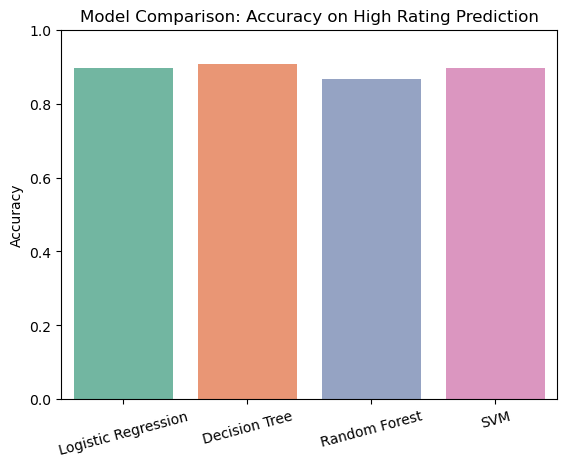

In [35]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']
accuracies = [
    accuracy_score(y_test, y_pred_logreg),
    accuracy_score(y_test, y_pred_tree),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_svm)
]

sns.barplot(x=models, y=accuracies, palette='Set2')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy on High Rating Prediction')
plt.xticks(rotation=15)
plt.show()

## ✅ Conclusion

This project aimed to explore and analyze Android app data from the Google Play Store, focusing on predicting whether an app has a **high user rating (≥ 4.7)** based on features like **number of reviews** and **installs**. Through a series of preprocessing, visualization, and classification techniques, we arrived at the following conclusions:

### 🔍 Key Insights:
- **Correlation analysis** revealed a moderate positive relationship between the number of reviews, installs, and ratings.
- Apps with higher installs and reviews generally received better ratings, although outliers exist.
- Some app categories, like **COMMUNICATION** and **SOCIAL**, receive significantly more reviews on average than others.

### 🤖 Model Performance Summary:
Four machine learning models were applied to predict high-rated apps:

| Model                 | Accuracy | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) |
|----------------------|----------|----------------------|------------------|--------------------|
| Logistic Regression  | 0.897    | 0.00                 | 0.00             | 0.00               |
| Decision Tree        | 0.908    | 0.63                 | 0.24             | 0.35               |
| Random Forest        | 0.866    | 0.34                 | 0.34             | 0.34               |
| SVM (RBF Kernel)     | 0.897    | 0.00                 | 0.00             | 0.00               |

> ⚠️ **Observation**: While all models achieved high overall accuracy (due to class imbalance), most struggled to correctly classify the minority class (`High_Rating = 1`). This indicates a need for:
> - Better feature engineering
> - Handling class imbalance (e.g., SMOTE, class weights)
> - Inclusion of more relevant features (e.g., category, content rating)

### 📌 Final Thoughts:
- The **Decision Tree** performed best at identifying highly rated apps among all models, though still with limited recall.
- The analysis is a strong starting point, but future work should involve balancing the dataset, incorporating categorical features, and tuning hyperparameters for better generalization.

This project demonstrated the full cycle of a machine learning workflow — from data cleaning and visualization to model evaluation — offering practical insights into the dynamics of app ratings and classification challenges in imbalanced datasets.